<a href="https://colab.research.google.com/github/shakshi12/RegEx-In-Python/blob/master/charlie_gcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install graphviz libgraphviz-dev libcgraph6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
libcgraph6 is already the newest version (2.40.1-2).
libcgraph6 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 0s (1,134 kB/s)
debconf: unable to initial

In [2]:
!pip install spektral

     |████████████████████████████████| 102kB 5.8MB/s 


In [3]:
 !git clone https://github.com/danielegrattarola/spektral.git

Cloning into 'spektral'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (486/486), done.
remote: Compressing objects: 100% (267/267), done.
remote: Total 4230 (delta 305), reused 332 (delta 188), pack-reused 3744
Receiving objects: 100% (4230/4230), 11.09 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (2650/2650), done.


In [4]:
cd spektral

/content/spektral


In [5]:
!git checkout tf2

error: pathspec 'tf2' did not match any file(s) known to git.


In [6]:
!pip install setup.py

ERROR: Could not find a version that satisfies the requirement setup.py (from versions: none)
ERROR: No matching distribution found for setup.py


In [7]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating spektral.egg-info
writing spektral.egg-info/PKG-INFO
writing dependency_links to spektral.egg-info/dependency_links.txt
writing requirements to spektral.egg-info/requires.txt
writing top-level names to spektral.egg-info/top_level.txt
writing manifest file 'spektral.egg-info/SOURCES.txt'
writing manifest file 'spektral.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tests
copying tests/__init__.py -> build/lib/tests
copying tests/test_utils.py -> build/lib/tests
copying tests/test_datasets.py -> build/lib/tests
creating build/lib/spektral
copying spektral/chem.py -> build/lib/spektral
copying spektral/__init__.py -> build/lib/spektral
creating build/lib/tests/test_layers
copying tests/test_layers/__init__.py -> build/lib/tests/test_layers
copying tests/test_layers/test_base.py -> build/lib/tests/test_layers
co

In [8]:
!pip install grpcio --upgrade

Requirement already up-to-date: grpcio in /usr/local/lib/python3.6/dist-packages (1.30.0)


In [40]:
from spektral.datasets import citation
data = citation.load_data('cora')
A, X, y, train_mask, val_mask, test_mask = data

'''l = []
import numpy as np
for i in range(360):
  l.append(True)
for i in range (35829):
  l.append(False)
train_mask = np.array(l)
l1 = []
for i in range(360):
  l1.append(False)
for i in range(829):
  l1.append(True)
for i in range(35000):
  l1.append(False)
val_mask = np.array(l1)
l2 = []
for i in range(31000):
  l2.append(False)
for i in range(4829):
  l2.append(True)
test_mask = np.array(l2)
y = np.zeros((36189,2))
n = df['label']
for i range(36189):
  if (n[i] == 1):
    y[i,1] = 1
  else if (n[i] == 0):
    y[i,0] = 1
'''

N = A.shape[0]
F = X.shape[-1]
n_classes = y.shape[-1]

Loading cora dataset
Pre-processing node features


In [20]:
print(A.shape)
print(X.shape)
print(train_mask.shape)
print(val_mask.shape)
print(test_mask.shape)
print(y.shape)
print(N)
print(F)
print(n_classes)

(2708, 2708)
(2708, 1433)
(2708,)
(2708,)
(2708,)
(2708, 7)
2708
1433
7


In [36]:
print(train_mask)
print(type(train_mask))
print(y)
print(type(y))
print(A)

[ True  True  True ... False False False]
<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
  (0, 0)	0.25
  (0, 633)	0.25
  (0, 1862)	0.22360679774997896
  (0, 2582)	0.25
  (1, 1)	0.25
  (1, 2)	0.2041241452319315
  (1, 652)	0.28867513459481287
  (1, 654)	0.3535533905932738
  (2, 1)	0.2041241452319315
  (2, 2)	0.16666666666666666
  (2, 332)	0.16666666666666666
  (2, 1454)	0.2886751345948129
  (2, 1666)	0.1543033499620919
  (2, 1986)	0.050251890762960605
  (3, 3)	0.5000000000000001
  (3, 2544)	0.5000000000000001
  (4, 4)	0.16666666666666666
  (4, 1016)	0.16666666666666666
  (4, 1256)	0.13608276348795434
  (4, 1761)	0.14433756729740646
  (4, 2175)	0.16666666666666666
  (4, 2176)	0.13608276348795434
  (5, 5)	0.25
  (5, 1629)	0.25
  (5, 1659)	0.28867513459481287
  :	:
  (2699, 2699)	0.5000000000000001
  (2700, 1151)	0.408248290463863
  (2700, 2700)	0.5000000000000001
  (2701

In [ ]:
type(A.shape)

tuple

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
type(y)
y.shape

(2708, 7)

In [ ]:
print(train_mask.shape)

(2708,)


In [ ]:
print(F)

1433


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
from spektral.layers import GraphConv
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout

In [41]:
# Model definition
X_in = Input(shape=(F, ))  # Input layer for X
A_in = Input((N, ), sparse=True)  # Input layer for A

graph_conv_1 = GraphConv(16, activation='relu')([X_in, A_in])
dropout = Dropout(0.5)(graph_conv_1)
graph_conv_2 = GraphConv(n_classes, activation='softmax')([dropout, A_in])

# Build model
model = Model(inputs=[X_in, A_in], outputs=graph_conv_2)

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
graph_conv_3 (GraphConv)        (None, 16)           22944       input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16)           0           graph_conv_3[0][0]         

In [35]:
X_in

<tf.Tensor 'input_3:0' shape=(None, 1433) dtype=float32>

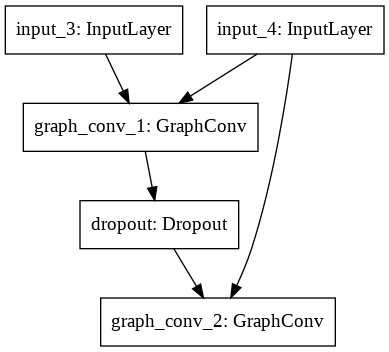

In [33]:
import tensorflow
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png")

In [43]:
from spektral import utils
A = utils.localpooling_filter(A)

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
graph_conv_3 (GraphConv)        (None, 16)           22944       input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16)           0           graph_conv_3[0][0]         

In [46]:
# Train model
X = X.toarray()
A = A.astype('f4') #csr format
validation_data = ([X, A], y, val_mask)
model.fit([X, A],y,
          sample_weight=train_mask,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False)  # Shuffling data means shuffling the whole graph

1/1 [==============================] - 0s 454ms/step - loss: 0.1006 - acc: 0.0929 - val_loss: 0.3592 - val_acc: 0.1300


In [49]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
input_shape

NameError: ignored

In [ ]:
# Evaluate model
eval_results = model.evaluate([X, A],
                              y,
                              sample_weight=test_mask,
                              batch_size=N)
print('Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

2708/2708 [==============================] - 0s 8us/step
Done.
Test loss: 1.8556935787200928
Test accuracy: 0.7449991106987


In [ ]:
print(test_mask[1708:2707])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [ ]:
print(val_mask[140:640])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [ ]:
print(train_mask[0:140])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [ ]:
print(X)

  (0, 1274)	0.11111111
  (0, 1247)	0.11111111
  (0, 1194)	0.11111111
  (0, 877)	0.11111111
  (0, 774)	0.11111111
  (0, 315)	0.11111111
  (0, 146)	0.11111111
  (0, 81)	0.11111111
  (0, 19)	0.11111111
  (1, 1349)	0.04347826
  (1, 1339)	0.04347826
  (1, 1332)	0.04347826
  (1, 1262)	0.04347826
  (1, 1257)	0.04347826
  (1, 1254)	0.04347826
  (1, 1177)	0.04347826
  (1, 1058)	0.04347826
  (1, 889)	0.04347826
  (1, 808)	0.04347826
  (1, 763)	0.04347826
  (1, 687)	0.04347826
  (1, 548)	0.04347826
  (1, 507)	0.04347826
  (1, 472)	0.04347826
  (1, 359)	0.04347826
  :	:
  (2706, 1198)	0.071428575
  (2706, 1171)	0.071428575
  (2706, 1042)	0.071428575
  (2706, 960)	0.071428575
  (2706, 953)	0.071428575
  (2706, 813)	0.071428575
  (2706, 775)	0.071428575
  (2706, 774)	0.071428575
  (2706, 520)	0.071428575
  (2706, 498)	0.071428575
  (2706, 247)	0.071428575
  (2706, 19)	0.071428575
  (2707, 1414)	0.07692308
  (2707, 1412)	0.07692308
  (2707, 1328)	0.07692308
  (2707, 1114)	0.07692308
  (2707, 1022)	0.

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(A.todense())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707
0,0.25,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.250000,0.204124,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.204124,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.000000,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2704,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
2705,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2706,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2


In [ ]:
type(train_mask)

numpy.ndarray

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
type(y)

numpy.ndarray